In [39]:
import numpy as np

# 1. Generate simple dataset
np.random.seed(42)
X = np.random.randn(100, 2)
true_w = np.array([1.5, -2.0])
true_b = 0.5
logits = X @ true_w + true_b
probs = 1 / (1 + np.exp(-logits))
y = (probs > 0.5).astype(int)

In [40]:
# 2. Initialize parameters
w = np.zeros(X.shape[1])
b = 0.0
lr = 0.1
epochs = 10000

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_crossentropy_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

In [42]:
#Training

for epoch in range(epochs):
    z = X @ w + b
    y_hat = sigmoid(z)

    # Loss: binary cross entropy
    loss = binary_crossentropy_loss(y, y_hat)

    # Gradients
    dw = (1 / len(X)) * X.T @ (y_hat - y)
    db = np.mean(y_hat - y)

    # Update parameters
    w -= lr * dw
    b -= lr * db

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Learned weights:", w, "bias:", b)    

Epoch 0, Loss: 0.6931
Epoch 1000, Loss: 0.1182
Epoch 2000, Loss: 0.0926
Epoch 3000, Loss: 0.0809
Epoch 4000, Loss: 0.0737
Epoch 5000, Loss: 0.0687
Epoch 6000, Loss: 0.0648
Epoch 7000, Loss: 0.0618
Epoch 8000, Loss: 0.0593
Epoch 9000, Loss: 0.0572
Learned weights: [ 7.23853534 -9.45533086] bias: 2.47730406201249


In [43]:
def predict(x):
    logits = x @ w + b
    probs = 1 / (1 + np.exp(-logits))
    y_pred = (probs > 0.5).astype(int)
    return y_pred

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

y_pred = predict(X)
acc = accuracy_score(y, y_pred)
print(acc)

0.99


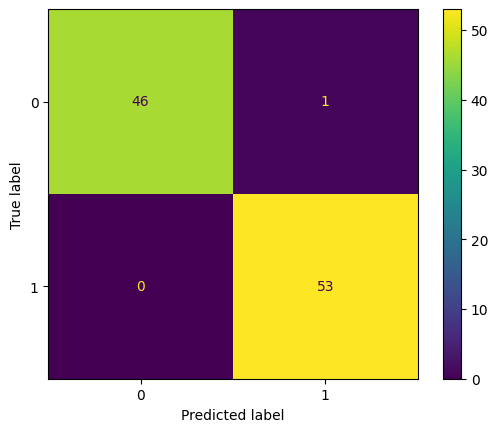

In [52]:
# 5. Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()